ревьювер — Гребенюк Артём

<a id=start></a>
# № 2 Учебный Проект → «Исследование Надёжности Заёмщиков» 🏦

ревьювер: **Гребенюк Артём**

В этоучебном проеке посмотрим на данные о клиентах банка.
Основные действия — привести данные к «приличному виду». Исправить пропуски, удалить дубликаты, найти ошибки в данных.


Ответим на вопросы:

> Есть ли зависимость между количеством детей и возвратом кредита в срок?

> Есть ли зависимость между семейным положением и возвратом кредита в срок?

> Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

> Как разные цели кредита влияют на его возврат в срок?

<div class="alert alert-block alert-warning">
<b>Remarks:</b> 

Любому проекту нужно введение - так ты поясняешь читателю, что тут вообще будет происходить. Также стоит задуматься, как еще его можно дополнить, чтобы сделать более ценным для читателя. В студенческом ноушене (если нет доступа, спроси куратора) есть статья о том, как мы оформляем работы.
    
Также советую тебе взглянуть на <a href="https://www.kaggle.com/notebooks/">работы</a> профессиональных аналитиков, чтобы оценить, как другие люди оформляют и проводят исследования. </div>


<div class="alert alert-block alert-info">
<b>💾 Fixed:</b> 
введение добавлено ✔
</div>

### Влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок?

In [1]:
import pandas as pd
import statistics
import seaborn as sns

In [2]:
# import nltk
# nltk.download("stopwords")

In [3]:
# from nltk.corpus import stopwords
# from pymystem3 import Mystem
# from string import punctuation

# Перевод в леммы работал очень медленно,
# поэтому эти импорты закомменчены…

> ### Шаг 1. Откройте таблицу и изучите общую информацию о данных

In [4]:
payment_stat = pd.read_csv('./datasets/data.csv')

In [5]:
payment_stat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


Проверим что у категорий `пенсионер` и `безработный` рабочий стаж указан в часах..

In [6]:
display(
    payment_stat.loc[
        payment_stat['income_type'].isin(['безработный', 'пенсионер']),
        'days_employed'
     ].describe()
)

count      3445.000000
mean     365004.309916
std       21075.016396
min      328728.720605
25%      346639.413916
50%      365213.306266
75%      383246.444219
max      401755.400475
Name: days_employed, dtype: float64

In [7]:
display(payment_stat.head())

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


Проверим явные дубликаты..

In [8]:
display(len(payment_stat.loc[payment_stat.duplicated()]))

54

[вот тут](#here_drop_again)

Удалим явные дубликаты

In [9]:
payment_stat.drop_duplicates(inplace=True)

И чтобы никаких больше дубликатов!

In [10]:
display(
    len(payment_stat.loc[payment_stat.duplicated()])
)

0

##### columns
children, days_employed, dob_years,

education, education_id, family_status, family_status_id,

gender, income_type, debt, total_income, purpose

оценим разброс значений по столбцу `days_employed`

In [11]:
display(payment_stat['days_employed'].describe())

count     19351.000000
mean      63046.497661
std      140827.311974
min      -18388.949901
25%       -2747.423625
50%       -1203.369529
75%        -291.095954
max      401755.400475
Name: days_employed, dtype: float64

оценим разброс значений по столбцу `'total_income'`

In [12]:
display(payment_stat['total_income'].describe())

count    1.935100e+04
mean     1.674223e+05
std      1.029716e+05
min      2.066726e+04
25%      1.030532e+05
50%      1.450179e+05
75%      2.034351e+05
max      2.265604e+06
Name: total_income, dtype: float64

> ### Шаг 2. Предобработка данных

#### Шаг 2.1. Пропуски
> В двух столбцах есть пропущенные значения, найдите их и заполните медианным значением по столбцу:

> *  опишите, какие пропущенные значения вы обнаружили;

<div id="caps_01"></div>

`days_employed` и `total_income` равны по количеству ненулевых значений.

> Похоже, кто не работал, тот и не заработал.

    © Кэп

> *  проверьте, какую долю составляют пропущенные значения в каждом из столбцов с пропусками;

In [13]:
days_employed_na = payment_stat['days_employed'].isna().sum()
total_income_na = payment_stat['total_income'].isna().sum()

numer_of_rows = payment_stat.shape[0]
print('Количество пропусков:')
print('\t\'days_employed\' =', days_employed_na, end=' ')
print('\tэто{percent: .2%}'.format(percent=days_employed_na/numer_of_rows))
print('\t\'total_income\' =', total_income_na, end=' ')
print('\tэто{percent: .2%}'.format(percent=total_income_na/numer_of_rows))

Количество пропусков:
	'days_employed' = 2120 	это 9.87%
	'total_income' = 2120 	это 9.87%


> *  приведите возможные причины появления пропусков в данных;

Во всех 54 явных дубликатах были `NaN` в `days_employed` и `total_income`.

А дальше давайте разбираться!

посмотрим на уникальные значения в столбце `'income_type' `

In [14]:
display(payment_stat['income_type'].unique())

array(['сотрудник', 'пенсионер', 'компаньон', 'госслужащий',
       'безработный', 'предприниматель', 'студент', 'в декрете'],
      dtype=object)

In [15]:
display(
    payment_stat.loc[
        (
            (payment_stat['days_employed'].isna())
            | (payment_stat['total_income'].isna())
        )
        & (payment_stat['income_type'] == 'безработный')
                 ].shape
)

(0, 12)

In [16]:
display(
    payment_stat.loc[
        (
            (payment_stat['days_employed'].isna())
            | (payment_stat['total_income'].isna())
        )
        & (payment_stat['income_type'] == 'студент')
    ].shape
)

(0, 12)

`Студенты` и `безработные` не "скрыли" свой доход или рабочие дни…

Кэп был неправ [здесь](#caps_01).

<div class="alert alert-block alert-success">
<b>✔️ Success:</b> вот и хорошо)

посмотрим категории доходов с пропусками в стаже работы и общем доходе

In [17]:
display(payment_stat.loc[(payment_stat['days_employed'].isna())
                 & (payment_stat['total_income'].isna())
                 ]['income_type'].unique()
       )

array(['пенсионер', 'госслужащий', 'компаньон', 'сотрудник',
       'предприниматель'], dtype=object)

Пропуски только в этих категориях.

посмотрим категории доходов в наборе данных

In [18]:
display(payment_stat['income_type'].unique())

array(['сотрудник', 'пенсионер', 'компаньон', 'госслужащий',
       'безработный', 'предприниматель', 'студент', 'в декрете'],
      dtype=object)

посмотрим на значения с пропусками в стаже работы и общем доходе

In [19]:
display(payment_stat.loc[(payment_stat['days_employed'].isna())
                 & (payment_stat['total_income'].isna())
                 ].head()
       )

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу
26,0,NaN,41,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование
29,0,NaN,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости
41,0,NaN,50,среднее,1,женат / замужем,0,F,госслужащий,0,NaN,сделка с подержанным автомобилем
55,0,NaN,54,среднее,1,гражданский брак,1,F,пенсионер,1,NaN,сыграть свадьбу


посмотрим категории образования

In [20]:
display(
    payment_stat['education'].unique(),
    len(payment_stat['education'].unique())
)

array(['высшее', 'среднее', 'Среднее', 'СРЕДНЕЕ', 'ВЫСШЕЕ',
       'неоконченное высшее', 'начальное', 'Высшее',
       'НЕОКОНЧЕННОЕ ВЫСШЕЕ', 'Неоконченное высшее', 'НАЧАЛЬНОЕ',
       'Начальное', 'Ученая степень', 'УЧЕНАЯ СТЕПЕНЬ', 'ученая степень'],
      dtype=object)

15

переведем в категории образования строковый регистр  
проверим изменения..

In [21]:
payment_stat['education'] = payment_stat['education'].str.lower()
display(
    payment_stat['education'].unique(),
    len(payment_stat['education'].unique())
)

array(['высшее', 'среднее', 'неоконченное высшее', 'начальное',
       'ученая степень'], dtype=object)

5

какие id есть у категорий образования

In [22]:
display(
    payment_stat['education_id'].unique(),
    len(payment_stat['education_id'].unique())
)

array([0, 1, 2, 3, 4])

5

Посмотрим какие цели кредита есть в наборе данных.

In [23]:
display(
    payment_stat['purpose'].unique(),
    len(payment_stat['purpose'].unique())
)

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

38

Ну никакого порядка!

Ещё вернёмся к этому изобилию…

<div class="alert alert-block alert-success">
<b>✔️ Success:</b> безусловно, нужно навести порядок

Переведём в сторковый регистр семейный статус.

In [24]:
payment_stat['family_status'] = payment_stat['family_status'].str.lower()
display(payment_stat['family_status'].unique())

array(['женат / замужем', 'гражданский брак', 'вдовец / вдова',
       'в разводе', 'не женат / не замужем'], dtype=object)

Посмотрим какого пола есть люди в наборе данных.

In [25]:
display(payment_stat['gender'].unique())

array(['F', 'M', 'XNA'], dtype=object)

Это что за зверь **XNA**?

In [26]:
display(payment_stat.groupby(by='gender')['gender'].count().sort_values(ascending=False))
display(payment_stat.loc[payment_stat['gender'] == 'XNA'])

gender
F      14189
M       7281
XNA        1
Name: gender, dtype: int64

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
10701,0,-2358.600502,24,неоконченное высшее,2,гражданский брак,1,XNA,компаньон,0,203905.157261,покупка недвижимости


Пусть же `XNA` будет девушкой, пожалуйста…

In [27]:
payment_stat.loc[payment_stat['gender'] == 'XNA', 'gender'] = 'F'

Посмотрим как представлены клиенты разного пола.

In [28]:
display(payment_stat.groupby(by='gender')['gender'].count().sort_values(ascending=False))

gender
F    14190
M     7281
Name: gender, dtype: int64

Посмотрим как связаны пропуски в данных и образование.

In [29]:
payment_stat.loc[(payment_stat['days_employed'].isna())
                 & (payment_stat['total_income'].isna())
                 ].groupby(by='education')['education'].count().sort_values(ascending=False)

education
среднее                1495
высшее                  535
неоконченное высшее      69
начальное                21
Name: education, dtype: int64

Посмотрим как связаны пропуски в данных и пол

In [30]:
payment_stat.loc[(payment_stat['days_employed'].isna())
                 & (payment_stat['total_income'].isna())
                 ].groupby(by='gender')['gender'].count().sort_values(ascending=False)

gender
F    1437
M     683
Name: gender, dtype: int64

In [31]:
payment_stat.loc[(payment_stat['days_employed'].isna())
                 & (payment_stat['total_income'].isna())
                 ].groupby(by='income_type')['income_type'].count().sort_values(ascending=False)

income_type
сотрудник          1077
компаньон           503
пенсионер           394
госслужащий         145
предприниматель       1
Name: income_type, dtype: int64

Посмотрим какие типы дохода есть в наборе данных.

In [32]:
display(payment_stat['income_type'].unique())

array(['сотрудник', 'пенсионер', 'компаньон', 'госслужащий',
       'безработный', 'предприниматель', 'студент', 'в декрете'],
      dtype=object)

Посмотрим для какого возраста чаще встречаются пропуски

In [33]:
payment_stat.loc[(payment_stat['days_employed'].isna())
                 & (payment_stat['total_income'].isna())
                 ].groupby(by='dob_years')['dob_years'].count().sort_values(ascending=False).head()

dob_years
34    67
31    64
42    64
40    64
35    63
Name: dob_years, dtype: int64

In [34]:
payment_stat.loc[(payment_stat['days_employed'].isna())
                 & (payment_stat['total_income'].isna())
                 ].groupby(by='children')['children'].count().sort_values(ascending=False)

children
 0     1397
 1      466
 2      201
 3       36
 20       9
 4        7
-1        3
 5        1
Name: children, dtype: int64

-1 — это значит ребёнок в проекте?

Пусть будет ещё по одному ребенку в трёх семьях)

In [35]:
payment_stat.loc[payment_stat['children'] == -1, 'children'] = 1

Посмотим на распределене количества детей.

In [36]:
display(
    payment_stat['children'].describe()
)

count    21471.000000
mean         0.543943
std          1.381262
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         20.000000
Name: children, dtype: float64

In [37]:
display(
    payment_stat.groupby(by='children')['children'].count().sort_values(ascending=False)
)

children
0     14107
1      4856
2      2052
3       330
20       76
4        41
5         9
Name: children, dtype: int64

Посмотрим на самых молодых, из тех у кого «20» детей.

In [38]:
display(
    payment_stat.loc[payment_stat['children'] == 20].sort_values(by='dob_years', ascending=True).head()
)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
2941,20,-2161.591519,0,среднее,1,женат / замужем,0,F,сотрудник,0,199739.941398,на покупку автомобиля
606,20,-880.221113,21,среднее,1,женат / замужем,0,M,компаньон,0,145334.865002,покупка жилья
3671,20,-913.161503,23,среднее,1,не женат / не замужем,4,F,сотрудник,0,101255.492076,на покупку подержанного автомобиля
5315,20,-2047.754733,24,среднее,1,женат / замужем,0,F,сотрудник,0,100415.236833,покупка коммерческой недвижимости
12909,20,NaN,25,среднее,1,женат / замужем,0,M,сотрудник,0,NaN,операции с жильем


Двадцать детей — это класс!

Но не 76 раз)

Выглядит малоправдоподобно и разрыв между 5 и 20 никак не представлен.

In [39]:
payment_stat.loc[payment_stat['children'] == 20, 'children'] = 2

20 очень похоже на 2)

In [40]:
payment_stat.loc[(payment_stat['days_employed'].isna())
                 & (payment_stat['total_income'].isna())
                 ].groupby(by='debt')['debt'].count().sort_values(ascending=False)

debt
0    1950
1     170
Name: debt, dtype: int64

Очень похоже что много `NaN` у тех кто не имел задолженность по возврату кредитов…

Может, они не брали кредит и поэтому эти данные не собранны…

Закончим модуль по статистике, посчитаю корреляцию)

На первый взгляд закономерность появления `NaN` не видна…

> *  объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

`Медиана` при выбросах будет точнее описывать "среднее" значение. То есть `медиана` менее чувствительна к выбросам в данных, чем `среднее арифметическое`.

#### Шаг 2.2. Аномалии

Хорошо бы уточнить откуда минус в данных..  
Возьмём минусовые значения по модулю

In [41]:
payment_stat.loc[payment_stat['days_employed'] < 0, 'days_employed'] \
    = payment_stat.loc[payment_stat['days_employed'] < 0, 'days_employed'].abs()

display(payment_stat['days_employed'].describe())

count     19351.000000
mean      66914.728907
std      139030.880527
min          24.141633
25%         927.009265
50%        2194.220567
75%        5537.882441
max      401755.400475
Name: days_employed, dtype: float64

Да, можно было и весь столбец «замодулить», но будем беречь вычеслительные мощности)

Не знаю как это сделать не так громоздко… 🤷‍♂️

медиана трудового стажа по возрасту

In [42]:
to_plot_incom_by_days = payment_stat.groupby(
        by='dob_years'
    )['days_employed'].median()
display(to_plot_incom_by_days.head())

dob_years
0     1759.038033
19     724.492610
20     674.838979
21     618.733817
22     703.310078
Name: days_employed, dtype: float64

[Text(0.5, 0, 'Возраст заёмщика, годы'), Text(0, 0.5, 'Трудовой стаж, часы')]

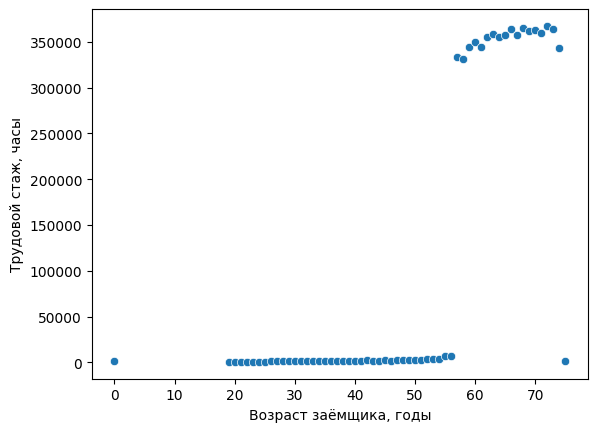

In [43]:
sns.scatterplot(
    x=to_plot_incom_by_days.index,
    y=to_plot_incom_by_days.array
).set(
    xlabel='Возраст заёмщика, годы',
    ylabel='Трудовой стаж, часы'
)

<div class="alert alert-block alert-success">
<b>✔️ Success:</b> здорово, что начинаешь самостоятельно изучать визуализации

<div class="alert alert-block alert-warning">
<b>⚠️ Remarks:</b>
    
Дальше будут проекты, где тебе придется строить очень много графиков, поэтому лучше сразу их правильно строить. На данном графике у тебя должны быть подписаны оси, ось Y должна содержать еще размерность данных (шт., млн. и т.д.). Оси и заголовок должны быть на одном языке. В заголовке еще можно написать за какой период у нас данные. Поправь и другие графики в проекте.

Правильное оформление графиков сильно повышает вероятность сдачи проекта с первого раза ;)
    
 https://python-graph-gallery.com/ Тут ты можешь найти много классных примеров

<div class="alert alert-block alert-info">
<b>💾 Fixed:</b> 
есть подписать оси, проставить размерности ✔
</div>

Есть выбросы, может количество трудового стажа связано с типом дохода.

медиана трудового стажа по типу занятости

In [44]:
to_plot_incom_by_days = payment_stat.groupby(
        by='income_type'
    )['days_employed'].median()
display(to_plot_incom_by_days)

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

[Text(0.5, 0, 'Трудовой стаж, часы'), Text(0, 0.5, 'Тип дохода')]

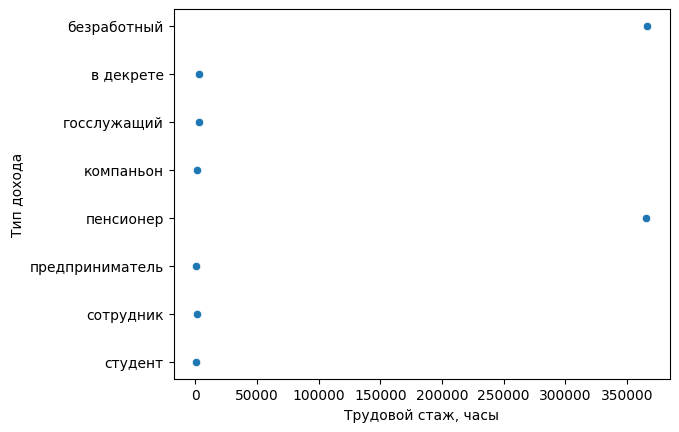

In [45]:
sns.scatterplot(
        x=to_plot_incom_by_days.array,
        y=to_plot_incom_by_days.index
    ).set(
        xlabel='Трудовой стаж, часы',
        ylabel='Тип дохода'
    )

Предположим, что если трудовой стаж более 100 лет или 36 500 дней,
то он указан в часах.  
Переведём часы в дни.

In [46]:
payment_stat.loc[
        payment_stat['days_employed'] > 36_500, 'days_employed'
    ] = payment_stat.loc[
            payment_stat['days_employed'] > 36_500,
            'days_employed'
        ] / 24

display(payment_stat['days_employed'].describe())

count    19351.000000
mean      4641.641176
std       5355.964289
min         24.141633
25%        927.009265
50%       2194.220567
75%       5537.882441
max      18388.949901
Name: days_employed, dtype: float64

Посмотрим максимальный стаж в годах

In [47]:
print('«Да я в Data Science отпахал',
      round(
          payment_stat['days_employed'].max()/365, 2
      ), 'лет!» – сказал матёрый Data Scientist.'
)

«Да я в Data Science отпахал 50.38 лет!» – сказал матёрый Data Scientist.


Посмотрим что со столбцом возраст заёмщика.

In [48]:
display(payment_stat['dob_years'].describe())

count    21471.000000
mean        43.279074
std         12.574291
min          0.000000
25%         33.000000
50%         42.000000
75%         53.000000
max         75.000000
Name: dob_years, dtype: float64

Рождённый с кредитом!

Сколько их таких с нулевым возрастом?

In [49]:
display(payment_stat.loc[payment_stat['dob_years'] == 0, 'dob_years'].count())

101

Какое у младенцев образование?

In [50]:
display(
    payment_stat.loc[payment_stat['dob_years'] == 0] \
        .groupby(by='education')['education'].count()
)

education
высшее                 35
неоконченное высшее     2
среднее                64
Name: education, dtype: int64

Найдем медиану возраста по типу образования.

In [51]:
hi_edu_age_median = payment_stat.loc[
        (payment_stat['dob_years'] != 0)
        & (payment_stat['education'] == 'высшее'),
        'dob_years'
    ].median()
cont_edu_age_median = payment_stat.loc[
        (payment_stat['dob_years'] != 0)
        & (payment_stat['education'] == 'неоконченное высшее'),
        'dob_years'
    ].median()
mid_edu_age_median = payment_stat.loc[
        (payment_stat['dob_years'] != 0)
        & (payment_stat['education'] == 'среднее'),
        'dob_years'
    ].median()

print('медиана возраста, по типу образования:')
print('высшее:', hi_edu_age_median)
print('неоконченное высшее:', cont_edu_age_median)
print('среднее:', mid_edu_age_median)

медиана возраста, по типу образования:
высшее: 39.0
неоконченное высшее: 31.5
среднее: 44.0


Поменяем нулевые значения на медианные для типа образования..

In [52]:
payment_stat.loc[
        (payment_stat['dob_years'] == 0)
        & (payment_stat['education'] == 'высшее'),
        'dob_years'
    ] = int(hi_edu_age_median)

payment_stat.loc[
        (payment_stat['dob_years'] == 0)
        & (payment_stat['education'] == 'неоконченное высшее'),
        'dob_years'
    ] = int(cont_edu_age_median)

payment_stat.loc[
        (payment_stat['dob_years'] == 0)
        & (payment_stat['education'] == 'среднее'),
        'dob_years'
    ] = int(mid_edu_age_median)

Есть ещё младенцы кто хочет взять кредит?

In [53]:
display(
    payment_stat.loc[
        payment_stat['dob_years'] == 0
    ]['dob_years'].count()
)

0

Посмотрим что теперь со столбцом возраст заёмщика?

In [54]:
display(payment_stat['dob_years'].describe())

count    21471.000000
mean        43.476689
std         12.219156
min         19.000000
25%         33.000000
50%         43.000000
75%         53.000000
max         75.000000
Name: dob_years, dtype: float64

Найдём медианное значение трудового стажа `days_employed` по типам дохода `income_type`.

In [55]:
median_of_days_employed_emp = payment_stat.loc[
        payment_stat['income_type'] == 'сотрудник',
        'days_employed'
    ].median()
median_of_days_employed_com = payment_stat.loc[
        payment_stat['income_type'] == 'компаньон',
        'days_employed'
    ].median()
median_of_days_employed_ret = payment_stat.loc[
        payment_stat['income_type'] == 'пенсионер',
        'days_employed'
    ].median()
median_of_days_employed_gov = payment_stat.loc[
        payment_stat['income_type'] == 'госслужащий',
        'days_employed'
    ].median()
median_of_days_employed_sel = payment_stat.loc[
        payment_stat['income_type'] == 'предприниматель',
        'days_employed'
    ].median()

Поменяем `NaN` в `days_employed` на медианное значение трудового стажа по типам дохода `income_type`.

In [56]:
payment_stat.loc[
        payment_stat['income_type'] == 'сотрудник',
        'days_employed'
    ].fillna(
        value=median_of_days_employed_emp,
        inplace=True
    )

payment_stat.loc[
        payment_stat['income_type'] == 'компаньон',
        'days_employed'
    ].fillna(
        value=median_of_days_employed_com,
        inplace=True
    )

payment_stat.loc[
        payment_stat['income_type'] == 'пенсионер',
        'days_employed'
    ].fillna(
        value=median_of_days_employed_ret,
        inplace=True
    )

payment_stat.loc[
        payment_stat['income_type'] == 'госслужащий',
        'days_employed'
    ].fillna(
        value=median_of_days_employed_gov,
        inplace=True
    )

payment_stat.loc[
        payment_stat['income_type'] == 'предприниматель',
        'days_employed'
    ].fillna(
        value=median_of_days_employed_sel,
        inplace=True
    )

и для дохода

In [57]:
median_of_total_income_emp = payment_stat.loc[
        payment_stat['income_type'] == 'сотрудник',
        'total_income'
    ].median()

median_of_total_income_com = payment_stat.loc[
        payment_stat['income_type'] == 'компаньон',
        'total_income'
    ].median()

median_of_total_income_ret = payment_stat.loc[
        payment_stat['income_type'] == 'пенсионер',
        'total_income'
    ].median()

median_of_total_income_gov = payment_stat.loc[
        payment_stat['income_type'] == 'госслужащий',
        'total_income'
    ].median()

median_of_total_income_sel = payment_stat.loc[
        payment_stat['income_type'] == 'предприниматель',
        'total_income'
    ].median()


payment_stat.fillna(
    value=median_of_total_income_emp,
    inplace=True
)
payment_stat.fillna(
    value=median_of_total_income_com,
    inplace=True
)
payment_stat.fillna(
    value=median_of_total_income_ret,
    inplace=True
)
payment_stat.fillna(
    value=median_of_total_income_gov,
    inplace=True
)
payment_stat.fillna(
    value=median_of_total_income_sel,
    inplace=True
)

<div class="alert alert-block alert-success">
<b>✔️ Success:</b> очень хорошо, что восстанавливаешь пропуски по категориям! 

##### columns
children, days_employed, dob_years,

education, education_id, family_status, family_status_id,

gender, income_type, debt, total_income, purpose

#### Шаг 2.3. Тип данных

In [58]:
payment_stat['total_income'] = payment_stat['total_income'].round(decimals=0)
payment_stat['total_income'] = payment_stat['total_income'].astype('int32')
payment_stat['children'] = payment_stat['children'].astype('uint8')
payment_stat['days_employed'] = payment_stat['days_employed'].astype('uint16')
payment_stat['dob_years'] = payment_stat['dob_years'].astype('uint16')
payment_stat['education_id'] = payment_stat['education_id'].astype('uint8')
payment_stat['family_status_id'] = payment_stat['family_status_id'].astype('uint8')
payment_stat['debt'] = payment_stat['debt'].astype('bool')

payment_stat['education'] = payment_stat['education'].astype('category')
payment_stat['family_status'] = payment_stat['family_status'].astype('category')
payment_stat['gender'] = payment_stat['gender'].astype('category')
payment_stat['income_type'] = payment_stat['income_type'].astype('category')
payment_stat['purpose'] = payment_stat['purpose'].astype('category')


In [59]:
columns_dtype = {
    'total_income': 'int32',
    'children': 'uint8',
    'days_employed': 'uint16',
    'dob_years': 'uint16',
    'education_id': 'uint8',
    'family_status_id': 'uint8',
    'debt': 'bool',
    'education': 'category',
    'family_status': 'category',
    'gender': 'category',
    'income_type': 'category',
    'purpose': 'category',
}

In [60]:
payment_stat = payment_stat.astype(columns_dtype)

In [61]:
display(payment_stat.info(memory_usage='deep'))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21471 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   children          21471 non-null  uint8   
 1   days_employed     21471 non-null  uint16  
 2   dob_years         21471 non-null  uint16  
 3   education         21471 non-null  category
 4   education_id      21471 non-null  uint8   
 5   family_status     21471 non-null  category
 6   family_status_id  21471 non-null  uint8   
 7   gender            21471 non-null  category
 8   income_type       21471 non-null  category
 9   debt              21471 non-null  bool    
 10  total_income      21471 non-null  int32   
 11  purpose           21471 non-null  category
dtypes: bool(1), category(5), int32(1), uint16(2), uint8(3)
memory usage: 534.7 KB


None

<div class="alert alert-block alert-warning">
<b>⚠️ Remarks:</b> 
    
Потенциал для эффективного изменения типов тут очень широк.
    
Давай я дам тебе две классные статьи, а ты попробуешь изменить типы данных на еще более подходящие и замеришь, сколько памяти в % ты сэкономишь:
    
https://pyprog.pro/data_types.html
    
https://habr.com/ru/company/ruvds/blog/442516/

<div class="alert alert-block alert-info">
<b>💾 Fixed:</b> 
534.7 KB вместо 12.8 MB  = 96 % профит ✔
</div>

#### Шаг 2.4. Строки-дубликаты <div id="here_drop_again"></div>

In [62]:
# после всех этих усреднений и на дубликаты проверить не грех
display(len(payment_stat.loc[payment_stat.duplicated()]))

17

In [63]:
payment_stat.drop_duplicates(inplace=True, ignore_index=True)

> - поясните, как выбирали метод для поиска и удаления дубликатов в данных;

         - стандартными `.duplicated()` и `.drop_duplicates()`
         - вручную при помощи `.unique()` и `.str.lower()` 

> - приведите возможные причины появления дубликатов;

         - человек который вводил данные ошибся 👽
         - после того как заменили `NaN` медианными значениям 👌
         - ошибки программ | компьютеров на этапе сбора и записи данных 🤖

#### Шаг 2.5. Два новых датафрейма

In [64]:
education_dict = pd.DataFrame(columns=['education_id', 'education'])
family_dict = pd.DataFrame(columns=['family_status_id', 'family_status'])

education_dict['education_id'] = payment_stat['education_id'].unique()
education_dict['education'] = education_dict['education_id']\
    .apply(lambda x: payment_stat.loc[payment_stat['education_id'] == x, 'education'].unique()[0])

family_dict['family_status_id'] = payment_stat['family_status_id'].unique()
family_dict['family_status'] = family_dict['family_status_id']\
    .apply(lambda x: payment_stat.loc[payment_stat['family_status_id'] == x, 'family_status'].unique()[0])

display(education_dict.head())
display(family_dict.head())

,education_id,education
0,0,высшее
1,1,среднее
2,2,неоконченное высшее
3,3,начальное
4,4,ученая степень


,family_status_id,family_status
0,0,женат / замужем
1,1,гражданский брак
2,2,вдовец / вдова
3,3,в разводе
4,4,не женат / не замужем


Оставим только айдишники для образования и семейного положения.

In [65]:
payment_stat.drop(labels=['education', 'family_status'], axis='columns', inplace=True)
display(payment_stat.tail())

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose
21449,1,4529,43,1,1,F,компаньон,False,224792,операции с жильем
21450,0,14330,67,1,0,F,пенсионер,False,156000,сделка с автомобилем
21451,1,2113,38,1,1,M,сотрудник,True,89673,недвижимость
21452,3,3112,38,1,0,M,сотрудник,True,244093,на покупку своего автомобиля
21453,2,1984,40,1,0,F,сотрудник,False,82047,на покупку автомобиля


#### Шаг 2.6. Категории дохода

Функция `set_category` присваивает категорию дохода

In [66]:
def set_category(income_value):
    if 0 <= income_value <= 30000:
        return 'E'
    elif 30001 <= income_value <= 50000:
        return 'D'
    elif 50001 <= income_value <= 200000:
        return 'C'
    elif 200001 <= income_value <= 1000000:
        return 'B'
    elif 1000001 <= income_value:
        return 'A'

In [67]:
print(set_category(50000))

D


Присваиваем категорию дохода отдельным столбцом.

In [68]:
payment_stat['total_income_category'] = payment_stat['total_income'].apply(set_category)
display(payment_stat.head())

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category
0,1,8437,42,0,0,F,сотрудник,False,253876,покупка жилья,B
1,1,4024,36,1,0,F,сотрудник,False,112080,приобретение автомобиля,C
2,0,5623,33,1,0,M,сотрудник,False,145886,покупка жилья,C
3,3,4124,32,1,0,M,сотрудник,False,267629,дополнительное образование,B
4,0,14177,53,1,1,F,пенсионер,False,158616,сыграть свадьбу,C


#### Шаг 2.7. Категории целей кредита

In [69]:
# 'операции с автомобилем'
# 'операции с недвижимостью'
# 'проведение свадьбы'
# 'получение образования'
#Create lemmatizer and stopwords list

# на kaggle нашел функцию, выглядит логично и прилично
# но работает очень долго…
# https://www.kaggle.com/alxmamaev/how-to-easy-preprocess-russian-text

# mystem = Mystem() 
# russian_stopwords = stopwords.words("russian")

# def purpose_categoriser(purpose_str):
#     tokens = mystem.lemmatize(purpose_str.lower())
#     tokens = [token for token in tokens if token not in russian_stopwords\
#               and token != " " \
#               and token.strip() not in punctuation]
    
#     purpose_str = " ".join(tokens)
#     print(purpose_str)
#     if 'автомобиль' in purpose_str:
#         return 'операции с автомобилем'
#     elif ('жилье' in purpose_str) | ('недвижимость' in purpose_str):
#         return 'операции с недвижимостью'
#     elif 'свадьба' in purpose_str:
#         return 'проведение свадьбы'
#     elif 'образование' in purpose_str:
#         return 'получение образования'

# использовать `.isin()`

In [70]:
# Жаль что через леммы очень долго…

# функция присваивает категорию цели займа
# понимаю что можно было короче писать «автом», например
# но так уж наверняка)

def purpose_categoriser_if(purpose_string):
    purpose_string = purpose_string.lower()
    if (
        'автомобиль' in purpose_string or 'автомобиля' in purpose_string
        or 'автомобили' in purpose_string or 'автомобилем' in purpose_string
    ):
         return 'операции с автомобилем'
    elif (
        'недвижимость' in purpose_string or 'недвижимости' in purpose_string
        or 'недвижимостью' in purpose_string or 'жильем' in purpose_string
        or 'жилье' in purpose_string or 'жилью' in purpose_string
        or 'жилья' in purpose_string
    ):
         return 'операции с недвижимостью'
    elif (
        'свадьба' in purpose_string or 'свадьбу' in purpose_string
        or 'свадьбы' in purpose_string
    ):
         return 'проведение свадьбы'
    elif (
        'образованием' in purpose_string or 'образования' in purpose_string
        or 'образование' in purpose_string
    ):
         return 'получение образования'

In [71]:
#display(
#    payment_stat['purpose'].unique(),
#    len(payment_stat['purpose'].unique())
#)

#whole_purposes = payment_stat['purpose'].unique()

# присваиваем категорию цели займа отдельным столбцом
payment_stat['purpose_category'] = payment_stat.loc[: , 'purpose'].apply(purpose_categoriser_if)

#display(payment_stat['purpose_category'].unique())

In [72]:
display(payment_stat['purpose_category'])

0        операции с недвижимостью
1          операции с автомобилем
2        операции с недвижимостью
3           получение образования
4              проведение свадьбы
                   ...           
21449    операции с недвижимостью
21450      операции с автомобилем
21451    операции с недвижимостью
21452      операции с автомобилем
21453      операции с автомобилем
Name: purpose_category, Length: 21454, dtype: object

In [73]:
display(payment_stat['purpose_category'].unique())

array(['операции с недвижимостью', 'операции с автомобилем',
       'получение образования', 'проведение свадьбы'], dtype=object)

### Шаг 3. Ответы на вопросы

> Есть ли зависимость между количеством детей и возвратом кредита в срок?

In [74]:
payment_stat.groupby(['children', 'debt'])['debt'].count()

children  debt 
0         False    13028
          True      1063
1         False     4410
          True       445
2         False     1926
          True       202
3         False      303
          True        27
4         False       37
          True         4
5         False        9
Name: debt, dtype: int64

In [75]:
children_list = list(payment_stat['children'].unique())

for child in children_list:
    no_debt = payment_stat.loc[(payment_stat['children'] == child) & (payment_stat['debt'] == 0)]['debt'].count()
    yes_debt = payment_stat.loc[(payment_stat['children'] == child) & (payment_stat['debt'] == 1)]['debt'].count()
    print('Просрочки с количеством детей', child, '= {percent:.0%}'.format(percent=yes_debt/no_debt))

Просрочки с количеством детей 1 = 10%
Просрочки с количеством детей 0 = 8%
Просрочки с количеством детей 3 = 9%
Просрочки с количеством детей 2 = 10%
Просрочки с количеством детей 4 = 11%
Просрочки с количеством детей 5 = 0%


<div class="alert alert-block alert-warning">
<b>⚠️ Remarks:</b> 
    
поскольку заемщиков с >2 детьми у нас в датасете очень мало, можно их объединить в одну категорию

> Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [76]:
payment_stat.groupby(['family_status_id', 'debt'])['debt'].count()

family_status_list = list(payment_stat['family_status_id'].unique())

for family_stat in family_status_list:
    no_debt = payment_stat.loc[(payment_stat['family_status_id'] == family_stat) & (payment_stat['debt'] == 0)]['debt'].count()
    yes_debt = payment_stat.loc[(payment_stat['family_status_id'] == family_stat) & (payment_stat['debt'] == 1)]['debt'].count()
    print(
        'Просрочки при семейном положении',
        family_dict.loc[family_dict['family_status_id'] == family_stat, 'family_status'].item(),
        '= {percent:.0%}'.format(percent=yes_debt/no_debt)
    )

Просрочки при семейном положении женат / замужем = 8%
Просрочки при семейном положении гражданский брак = 10%
Просрочки при семейном положении вдовец / вдова = 7%
Просрочки при семейном положении в разводе = 8%
Просрочки при семейном положении не женат / не замужем = 11%


<div class="alert alert-block alert-danger">
<b>❌ Needs fixing:</b> нужно исправить все ошибки в проекте

<div class="alert alert-block alert-info">
<b>💾 Fixed:</b> 
исправить так исправить ✔
</div>

При семейном положении вдовец / вдова меньший процент задержек…

> Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [87]:
payment_stat.groupby(['total_income_category', 'debt'])['debt'].count()

total_income_cat_list = sorted(
        list(
            payment_stat['total_income_category'].unique()
        )
    )
for income_cat in sorted(total_income_cat_list):
    no_debt = payment_stat.loc[(payment_stat['total_income_category'] == income_cat) & (payment_stat['debt'] == 0)]['debt'].count()
    yes_debt = payment_stat.loc[(payment_stat['total_income_category'] == income_cat) & (payment_stat['debt'] == 1)]['debt'].count()
    print(
        'Просрочки при уровне дохода категории', income_cat,
        '= {percent:.0%}'.format(percent=yes_debt/no_debt)
    )

Просрочки при уровне дохода категории A = 9%
Просрочки при уровне дохода категории B = 8%
Просрочки при уровне дохода категории C = 9%
Просрочки при уровне дохода категории D = 6%
Просрочки при уровне дохода категории E = 10%


При категории дохода D меньший процент задержек…

> Как разные цели кредита влияют на его возврат в срок?

In [ ]:
purpose_cat_list = list(payment_stat['purpose_category'].unique())

for purpose_cat in purpose_cat_list:
    no_debt = payment_stat.loc[(payment_stat['purpose_category'] == purpose_cat) & (payment_stat['debt'] == 0)]['debt'].count()
    yes_debt = payment_stat.loc[(payment_stat['purpose_category'] == purpose_cat) & (payment_stat['debt'] == 1)]['debt'].count()
    print(
        'Просрочки для категории', purpose_cat,
        '= {percent:.0%}'.format(percent=yes_debt/no_debt)
    )


Для категории операции с недвижимостью меньший процент задержек…

In [ ]:
debt_by_pourpouse_category = payment_stat.groupby(['purpose_category', 'debt'])['purpose'].count()
display(debt_by_pourpouse_category)

In [ ]:
debt_by_pourpouse_category = payment_stat.pivot_table(values='purpose',
                                                      index='purpose_category',
                                                      columns='debt',
                                                      aggfunc='count', sort=True)
display(debt_by_pourpouse_category)

<div class="alert alert-block alert-warning">
<b>⚠️ Remarks:</b> 
    
Также давай напишем информативный общий вывод. Подумай об этом так: большинство заказчиков мало понимают в датасаенсе и начнут читать работу именно с него. Вывод должен содержать все обнаруженные инсайды и главное цифры.</div>

Для вывода я бы пообщался с экспертом, потомучто:

Часто процент задержек около 10%, трудно оценить на сколько разница в 1-2 % критична.